# Challenge

## 1. Objective

> The objetive this notebook is to present the data exploration that subsidizied the formulation of the report presented for an interview challenge.

> Dataset available in: https://github.com/cyentia/sample_data_eda

 ## 2. Imports

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

## 3. About Dataset

### 3.1. Dictionary


| column                   | description                                        |
|--------------------------|----------------------------------------------------|
| id                       | Unique record identifier                           |
| affected_count           | Number of data records involved in the breach      |
| total_amount             | Dollar cost of the breach                          |
| naic_sector              | Two digit NAICS code of the industry sector        |
| naic_national_industry   | Full six-digit NAICS code for the breached company |
| sector                   | Text description of the `naic_sector` field        |
| breach_date              | Date the breach occurred                           |
| cause                    | High level summary of the cause of the breach      |

### 3.2. Dataset

In [2]:
dataset = pd.read_csv('sample_breaches.csv')
dataset

,id,affected_count,total_amount,naic_sector,naic_national_industry,sector,breach_date,cause
0,1,15,10269,44.0,446110.0,Retail,2014-10-26,Internal - Other
1,2,39,332165,61.0,611210.0,Education,2020-08-17,Internal - Consultant
2,3,90,4473,56.0,561790.0,Administrative,2019-11-15,External - Other
3,4,10,1471919,54.0,541715.0,Professional,2011-04-09,Internal - Trusted Third Party (TTP)
4,5,1,3986,92.0,926130.0,Public,2019-03-31,Internal - Trusted Third Party (TTP)
...,...,...,...,...,...,...,...,...
9995,9996,27,5791,NaN,NaN,NaN,2014-01-26,Internal - Other
9996,9997,17790,2134,56.0,561599.0,Administrative,2017-09-22,External - Former Consultant
9997,9998,45,3246,62.0,621111.0,Healthcare,2016-09-14,Internal - Trusted Third Party (TTP)
9998,9999,1515,2528131,22.0,221210.0,Utilities,2012-06-05,Internal - Employee


## 4. Data Exploration

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      10000 non-null  int64  
 1   affected_count          10000 non-null  int64  
 2   total_amount            10000 non-null  int64  
 3   naic_sector             9865 non-null   float64
 4   naic_national_industry  9865 non-null   float64
 5   sector                  9865 non-null   object 
 6   breach_date             10000 non-null  object 
 7   cause                   9294 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 625.1+ KB


> ### 1) What is the period of the dataset?

In [4]:
dataset_years = {int(i[0:4]) for i in dataset['breach_date']}

print(f'Older Year: {min(dataset_years)}')
print(f'Newer Year: {max(dataset_years)}')

Older Year: 2011
Newer Year: 2020


> ### 2) Which sector was most affected between 2011 and 2020?

In [5]:
sector_dataset = dataset[['id', 'sector']].groupby(
    by='sector', as_index=False).count().sort_values(by='id', ascending=False)

sector_dataset['Percentage (%)'] = (sector_dataset['id'] / sum(sector_dataset['id']) * 100).round(2)

new_columns = {'id': 'Number of Breach (n)', 'sector': 'Sector'}
sector_dataset = sector_dataset.rename(columns=new_columns)

sector_dataset = sector_dataset.reset_index(drop=True) # sector_dataset -> It will be used later

print_sector_dataset = sector_dataset.copy(deep=True)
print_sector_dataset['Number of Breach (n)'] = print_sector_dataset[
    'Number of Breach (n)'].apply(lambda x: f'{x:,}')

print_sector_dataset

,Sector,Number of Breach (n),Percentage (%)
0,Financial,"1,258",12.75
1,Professional,"1,232",12.49
2,Healthcare,"1,158",11.74
3,Administrative,"1,089",11.04
4,Education,719,7.29
5,Public,655,6.64
6,Retail,586,5.94
7,Information,579,5.87
8,Manufacturing,556,5.64
9,Other,415,4.21


> The most affected sectors are: **Financial** (12.75%), **Professional** (12.49%), **Healthcare** (11.74%) and **Administrative** (11.04%). These sectors together represent about **48.02%** of the total number of breach.

> ### 3) What was the financial impact, by sector, between 2011 and 2020?

In [6]:
total_amount_dataset = dataset[['sector', 'total_amount']].groupby(
    by='sector', as_index=False
).sum().sort_values(by='total_amount', ascending=False)

new_columns = {'sector': 'Sector', 'total_amount': 'Total Amount ($)'}
total_amount_dataset = total_amount_dataset.rename(columns=new_columns)

total_amount_dataset = total_amount_dataset.reset_index(drop=True) # total_amount_dataset -> It will be later

print_total_amount_dataset = total_amount_dataset.copy(deep=True)

print_total_amount_dataset['Total Amount ($)'] = total_amount_dataset['Total Amount ($)'
                                                                 ].apply(lambda value: f'{value:,.2f}')

print_total_amount_dataset

,Sector,Total Amount ($)
0,Other,"9,840,889,832.00"
1,Administrative,"7,139,324,569.00"
2,Financial,"5,633,009,579.00"
3,Professional,"3,972,471,086.00"
4,Education,"3,865,529,928.00"
5,Information,"3,323,897,320.00"
6,Healthcare,"3,086,160,686.00"
7,Retail,"2,020,036,636.00"
8,Public,"1,850,651,416.00"
9,Manufacturing,"1,413,584,507.00"


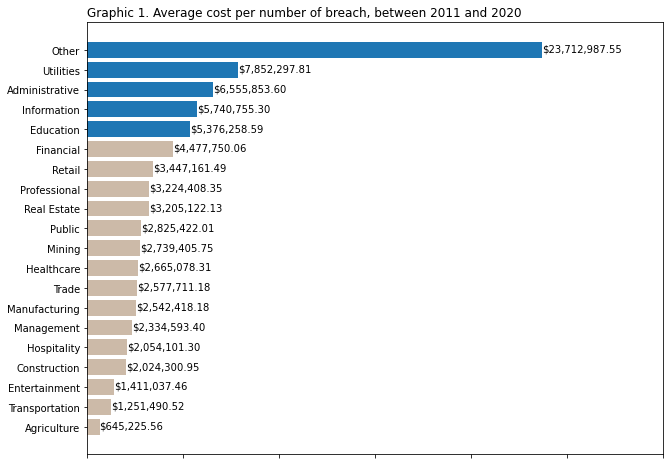

In [7]:
new_dataset = sector_dataset.merge(total_amount_dataset, how='left', on='Sector')
new_dataset['Amount x Breach ($/n)'] = new_dataset['Total Amount ($)'] / new_dataset['Number of Breach (n)']


fig = plt.figure(figsize=(8, 6))
ax = fig.add_axes([0, 0, 1, 1])

graphic_1 = new_dataset[
    ['Sector', 'Amount x Breach ($/n)']].sort_values(by='Amount x Breach ($/n)', ascending=True)

graphic_1 = graphic_1.reset_index(drop=True)

y = graphic_1['Sector']
x = graphic_1['Amount x Breach ($/n)']

ax.set_title('Graphic 1. Average cost per number of breach, between 2011 and 2020', fontsize=12, loc='left')

ax.set_xlim(0, 30000000)
ax.set_xticklabels('')


for i in range(len(graphic_1.index)):
    ax.annotate(
        f"${x[i]:,.2f}",
        xy=(x[i], graphic_1.index[i] - 0.1)
)   
    
ax.barh(y, x)

for i in range(15):
    ax.barh(y[i], x[i], color='#ccbaa8')


plt.show()

> Note that although the **“Others”** and **“Utilities”** sectors together account for about **4.75%** of the total number of breaches, they are the sectors that have **proportionally** the **greatest financial impact**. Others sectors were  **"Financial"**, **"Professional"**, **"Healthcare"** and **"Administrative"**.

> ### 4) Which sector had the largest number of data records involved in the breach between 2011 and 2020?

In [8]:
affected_count_dataset = dataset[['sector', 'affected_count']].groupby(
    by='sector', as_index=False).max().sort_values(by='affected_count', ascending=False)

new_columns = {'sector': 'Sector', 'affected_count': 'Number of Data Records Involved (n)'}
affected_count_dataset = affected_count_dataset.rename(columns=new_columns)

affected_count_dataset = affected_count_dataset.reset_index(drop=True) # affected_count_dataset -> Il will be later

print_affected_count_dataset = affected_count_dataset.copy(deep=True)

print_affected_count_dataset['Number of Data Records Involved (n)'] = print_affected_count_dataset[
    'Number of Data Records Involved (n)'].apply(lambda x: f'{x:,}')


print_affected_count_dataset

,Sector,Number of Data Records Involved (n)
0,Retail,"30,752,654"
1,Financial,"16,063,249"
2,Professional,"7,421,840"
3,Entertainment,"6,008,718"
4,Education,"3,560,696"
5,Administrative,"2,320,670"
6,Manufacturing,"1,429,638"
7,Healthcare,"1,252,441"
8,Transportation,"888,530"
9,Other,"808,410"


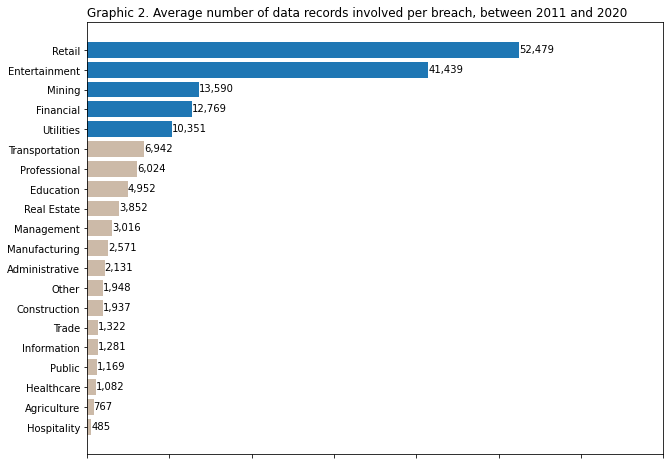

In [9]:
new_dataset = sector_dataset.merge(affected_count_dataset, how='left', on='Sector')
new_dataset['Data Records Involved x Breach'] = new_dataset[
    'Number of Data Records Involved (n)'] / new_dataset['Number of Breach (n)']

fig = plt.figure(figsize=(8, 6))
ax = fig.add_axes([0, 0, 1, 1])

graphic_2 = new_dataset[
    ['Sector', 'Data Records Involved x Breach']].sort_values(
    by='Data Records Involved x Breach', ascending=True)

graphic_2 = graphic_2.reset_index(drop=True)

y = graphic_2['Sector']
x = graphic_2['Data Records Involved x Breach']

ax.set_title(
    'Graphic 2. Average number of data records involved per breach, between 2011 and 2020', 
    fontsize=12, loc='left'
)

ax.set_xlim(0, 70000)
ax.set_xticklabels('')


for i in range(len(graphic_1.index)):
    ax.annotate(
        f"{x[i]:,.0f}",
        xy=(x[i], graphic_1.index[i] - 0.1)
)   
    
ax.barh(y, x)

for i in range(15):
    ax.barh(y[i], x[i], color='#ccbaa8')


plt.show()

> In terms of the average number of recorded data involved in the breaches, the **“Retail”** sector **was the most compromised**, followed by **“Entertainment”** sector, **“Mining”** sector, **“Financial”** sector and **“Utilities”** sector.